SToichiometry ODE stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
figSize=800

In [78]:
# Here we have a single species (N=1) that starts at x0 = 10 mg/mL
x0=np.array([0,1,7,5,8,750])
print(x0)

[  0   1   7   5   8 750]


In [79]:
# Stoichiometry matrix
S = [[-1,1,0,0,0,0,0,0,0],
        [1,-1,0,0,0,0,0,0,0],
        [0,0,1,-1,0,0,0,0,0],
        [0,0,0,1,-1,-1,0,0,0],
        [0,0,0,0,0,1,-1,0,0],
        [0,0,0,0,0,0,0,1,-1]]
print(S)
len(S)

[[-1, 1, 0, 0, 0, 0, 0, 0, 0], [1, -1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, -1, 0, 0, 0, 0, 0], [0, 0, 0, 1, -1, -1, 0, 0, 0], [0, 0, 0, 0, 0, 1, -1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, -1]]


6

In [99]:
# Define Parameters
pars = {'k1': 30, 'k2': 15, 'k3': 20, 'k4': 5, 'k5': 0.01, 'k6': 5, 'k7': 0.1, 'k8': 5, 'k9': 0.1}
def W(x,t,pars=pars):
  return np.array([pars['k1']*x[0],
                   pars['k2']*x[1],
                   pars['k3']*x[1],
                   pars['k4']*x[2],
                   pars['k5']*x[3],
                   pars['k6']*x[3],
                   pars['k7']*x[4],
                   pars['k8']*x[4],
                   pars['k9']*x[5]])


In [102]:
Wlist = [pars['k1']*x0[0], pars['k2']*x0[1], pars['k3']*x0[1], pars['k4']*x0[2], pars['k5']*x0[3], pars['k6']*x0[3], pars['k7']*x0[4], pars['k8']*x0[4],pars['k8']*x0[5]]
print(Wlist)
flow_1 = Wlist[0]-Wlist[1]
flow_2 = Wlist[1]-Wlist[0]-Wlist[2]
flow_3 = Wlist[2]-Wlist[3]
flow_4 = Wlist[3]-Wlist[4]-Wlist[5]
flow_5 = Wlist[5]-Wlist[6]-Wlist[7]
flow_6 = Wlist[7]-Wlist[8]

flowlist = [flow_1,flow_2,flow_3,flow_4,flow_5,flow_6]
print(flowlist)

[0, 15, 20, 35, 0.05, 25, 0.8, 40, 3750]
[-15, -5, -15, 9.950000000000003, -15.8, -3710]


In [97]:
# Define the RHS of the ODE:
def dxdt(x,t,pars=pars):
  return (S @ W(x,t,pars=pars)).flatten()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


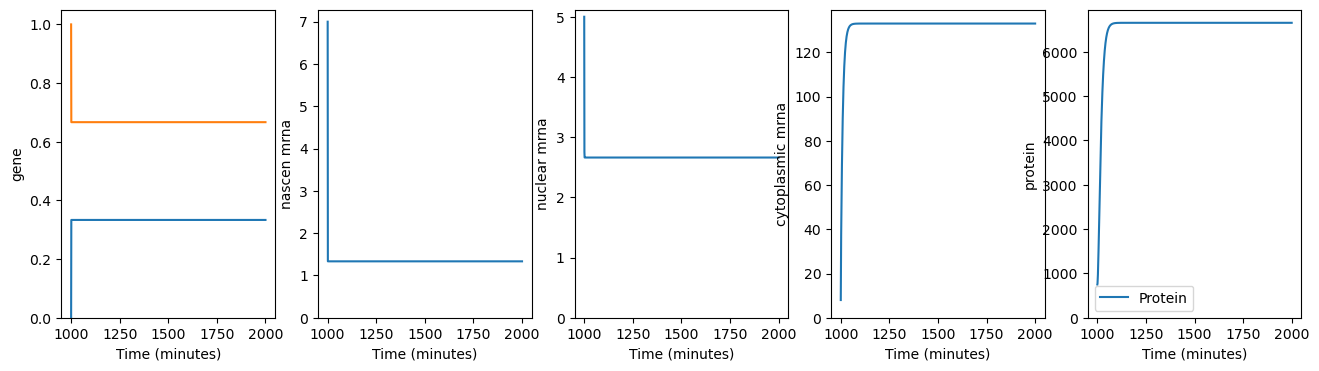

In [100]:
# The number of species is 3:  'OFF', 'ON','nascent RNA','nuclear RNA','cytoplasmic RNA', 'Protein'
# Define the integration time span
timeSpan=np.linspace(1000,2000,1001)
# Integrate the ODE for different initial conditions
trajectory=odeint(dxdt,x0,timeSpan)
#print(trajectory[0,:])
#print(trajectory[-1,:])
# Plot the results with the first two species in the same plot and the third species in a separate plot
fig, ax = plt.subplots(1,5,figsize=(16,4))

ax[0].plot(timeSpan,trajectory[:,0],label='OFF')
ax[0].plot(timeSpan,trajectory[:,1],label='ON')
#ax[0].set_xlim(xmin=1000, xmax=1250)
ax[0].set_ylim(ymin=0)
ax[0].set_xlabel('Time (minutes)')
ax[0].set_ylabel('gene')
plt.legend()
ax[1].plot(timeSpan,trajectory[:,2],label='Nascent RNA')
#ax[1].set_xlim(xmin=1000, xmax=1250)
ax[1].set_ylim(ymin=0)
ax[1].set_xlabel('Time (minutes)')
ax[1].set_ylabel('nascen mrna')
plt.legend()
ax[2].plot(timeSpan,trajectory[:,3],label='Nuclear mRNA')
#ax[2].set_xlim(xmin=1000, xmax=1250)
ax[2].set_ylim(ymin=0)
ax[2].set_xlabel('Time (minutes)')
ax[2].set_ylabel('nuclear mrna')
plt.legend()
ax[3].plot(timeSpan,trajectory[:,4],label='Cytoplasmic mRNA')
#ax[3].set_xlim(xmin=1000, xmax=1250)
ax[3].set_ylim(ymin=0)
ax[3].set_xlabel('Time (minutes)')
ax[3].set_ylabel('cytoplasmic mrna')
plt.legend()


ax[4].plot(timeSpan,trajectory[:,5],label='Protein')
#ax[4].set_xlim(xmin=1000, xmax=1250)
ax[4].set_ylim(ymin=0)
ax[4].set_xlabel('Time (minutes)')
ax[4].set_ylabel('protein')
plt.legend()
plt.show()